

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

**BOUMLIK Oumaima**

In this Implementation, I used Detectron2 with X101 FPN Backbone

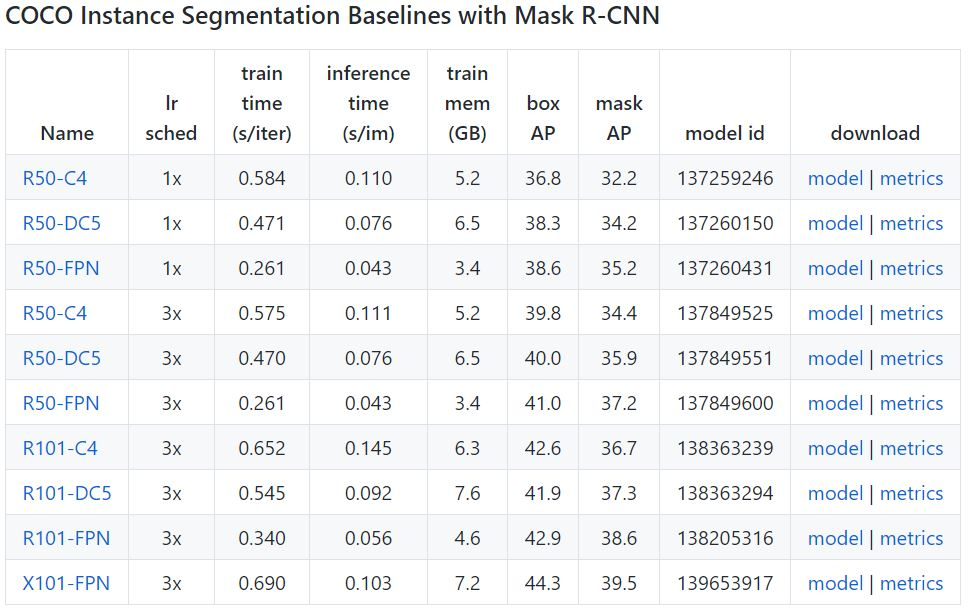

# Environment Setup

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
input_path = '/content/drive/MyDrive/data/data_rond_point/'
out_path = '/content/drive/MyDrive/Projet_P4/poly-yolo/poly_yolo/poly_yolo_predict_rondpoint/'

# Run Instance Segmentation on an Image

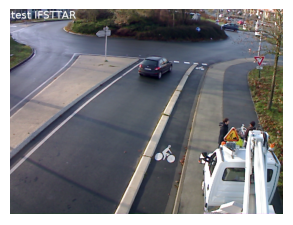

In [ ]:
import glob
import matplotlib.pyplot as plt

labeled_images = list(glob.iglob(os.path.join(input_path, "*.png")))
labeled_images = sorted(labeled_images, key=lambda x: int(os.path.split(x)[1].split('.')[0]))
figsize = (5, 5)
_, ax = plt.subplots(1, figsize=figsize)
im = cv2.imread(labeled_images[200])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
height, width = im.shape[:2]
size=(width, height)
ax.set_ylim(height + 10, -10)
ax.set_xlim(-10, width + 10)
ax.axis('off')
ax.imshow(im.astype(np.uint8))

In [ ]:
cfg = get_cfg()
# Import Panoptic Segmentation Model 
# COCO-InstanceSegmentation
# cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

# Import Instance Segmentation Model 
# https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
# model name: X101-FPN 
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

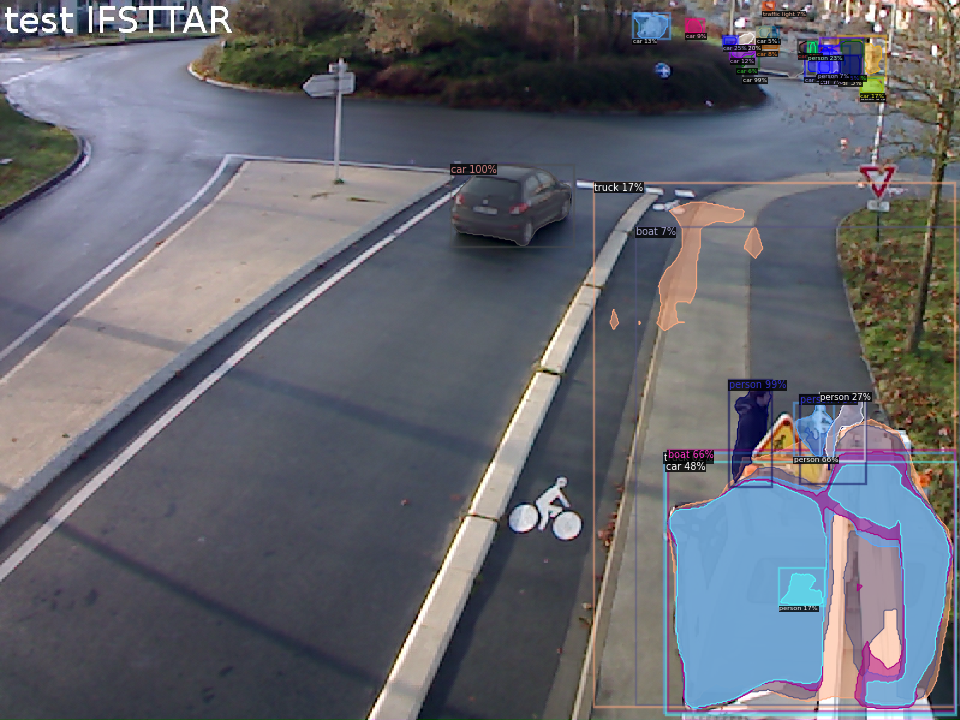

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Run Instance Segmentation on a Video

In [ ]:
img_list = [cv2.imread(file) for file in glob.glob(input_path + "*.png")]

In [ ]:
#Generate video from image files
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize

fourcc = VideoWriter_fourcc(*'mp4v')
outputfn = os.path.join(input_path, "out.avi")
fps = 24.19# reset manually

vw = VideoWriter(outputfn, fourcc, float(fps), size)

print("the size of images is : {}".format(size))

for im in img_list:
  height, width, channel = im.shape
  assert channel == 3
  if size[0] != im.shape[1] or size[1] != im.shape[0]:
    im = resize(im, size)
  vw.write(im.astype(np.uint8))

cv2.destroyAllWindows()
vw.release()
print(vw)

the size of images is : (800, 600)
<VideoWriter 0x7f2c100eee70>


In [ ]:
#Download the video
from google.colab import files
files.download(os.path.join(input_path, "out.avi"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
video_rond_point = '/content/drive/MyDrive/data/data_rond_point_video/video_rond_point.mp4'

In [ ]:
%cd /content/drive/MyDrive/data/data_rond_point_video/
%ls

/content/drive/MyDrive/data/data_rond_point_video
detectron2/  video_rond_point_clip.mp4  video_rond_point.mp4


In [ ]:
# Install dependencies
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
#!ffmpeg -i video_rond_point.mp4 -t 00:00:26 -c:v copy video_rond_point.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
#remove output video if it already exists
!rm video-output.mp4


rm: cannot remove 'video-output.mp4': No such file or directory


In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
# !python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video_rond_point.mp4 --confidence-threshold 0.6 --output video-output.mkv \
#   --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml --video-input video_rond_point.mp4 --confidence-threshold 0.6 --output video-output.mp4 \
  --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl


fatal: destination path 'detectron2' already exists and is not an empty directory.
Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[01/21 17:41:54 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl'], output='video-output.mp4', video_input='video_rond_point.mp4', webcam=False)
[01/21 17:42:01 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl
[01/21 17:42:01 

In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('video-output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)